In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [54]:
df_train_raw = pd.read_csv('train_ctrUa4K.csv')
df_train_raw.shape

(614, 13)

In [55]:
df_train_raw.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df_train_raw.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has many missing values in various categories. It needs to be taken care of after EDA.

In [57]:
df_train_raw.Credit_History.unique()

array([ 1.,  0., nan])

In [58]:
df_train_raw.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [59]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 1.0, 'Target Label Comparison')

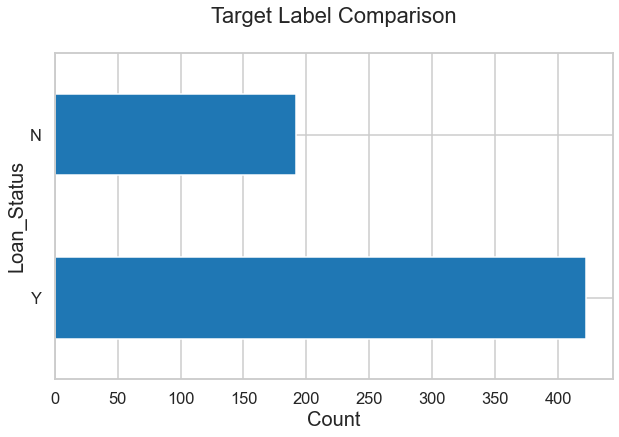

In [60]:
df_train_raw['Loan_Status'].value_counts().plot(kind = 'barh', figsize = (10,6))
plt.xlabel('Count')
plt.ylabel('Loan_Status')
plt.title('Target Label Comparison')

In [61]:
## Percentage of TARGET label categories
100*df_train_raw['Loan_Status'].value_counts()/df_train_raw.shape[0]

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

The data seems to be highly imbalanced.
Ratio = 69:31

Also the Dependents column has the datatype as 'object', which needs to be taken care of.

In [62]:
for col in df_train_raw.columns[1:]:
    if len(df_train_raw[col].unique()) < 15:
        print(col, ': ',df_train_raw[col].unique())

Gender :  ['Male' 'Female' nan]
Married :  ['No' 'Yes' nan]
Dependents :  ['0' '1' '2' '3+' nan]
Education :  ['Graduate' 'Not Graduate']
Self_Employed :  ['No' 'Yes' nan]
Loan_Amount_Term :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History :  [ 1.  0. nan]
Property_Area :  ['Urban' 'Rural' 'Semiurban']
Loan_Status :  ['Y' 'N']


In [63]:
features_with_na = [feature for feature in df_train_raw.columns if df_train_raw[feature].isnull().sum() > 1]
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Data Exploration

## Univariate Analysis

In [64]:
df_train_sample = df_train_raw.copy()

In [65]:
df_train_sample.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [66]:
numerical_features = [feature for feature in df_train_sample.columns if df_train_sample[feature].dtypes != 'O' and feature not in ['Loan_Status']]
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [67]:
discrete_features = [feature for feature in numerical_features if len(df_train_sample[feature].unique()) < 15]
discrete_features

['Loan_Amount_Term', 'Credit_History']

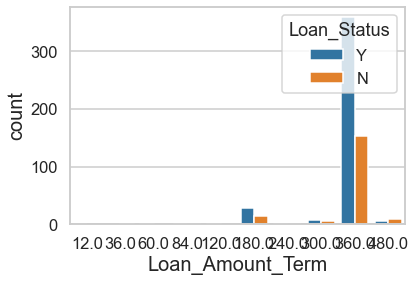

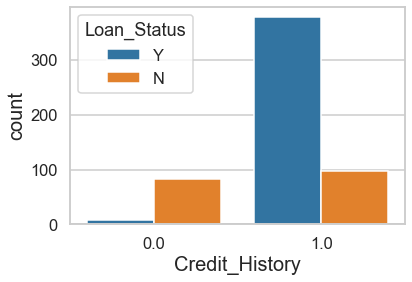

In [68]:
for i,feature in enumerate(discrete_features):
    plt.figure(i)
    sns.countplot(data = df_train_sample, x=feature, hue='Loan_Status')

In [69]:
continuous_features = [feature for feature in numerical_features if len(df_train_sample[feature].unique()) >= 15]
continuous_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

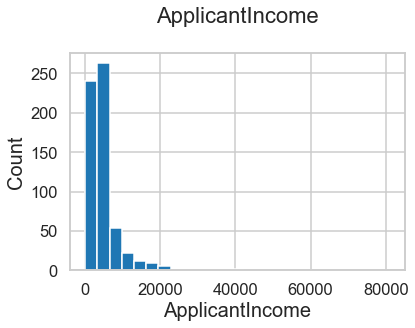

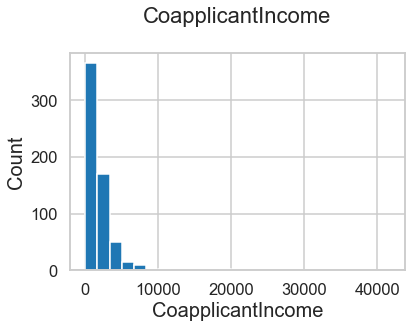

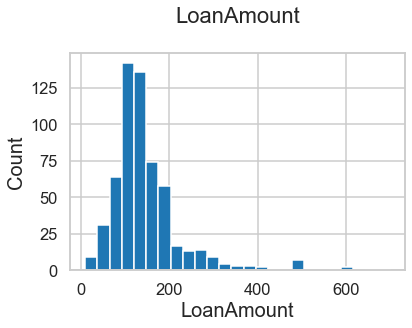

In [70]:
for i,feature in enumerate(continuous_features):
    plt.figure(i)
    df_train_sample[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [71]:
# for feature in continuous_features:
#     if 0 in df_train_sample[feature].unique():
#         pass
#     else:
#         df_train_sample[feature] = np.log(df_train_sample[feature])

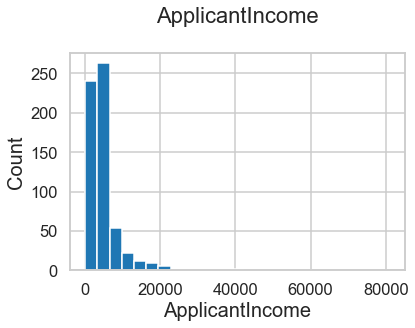

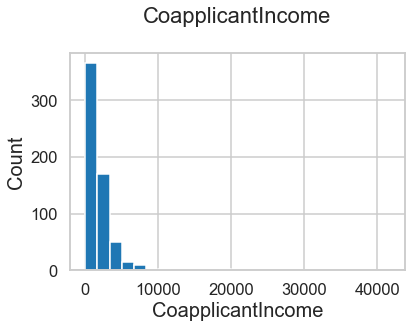

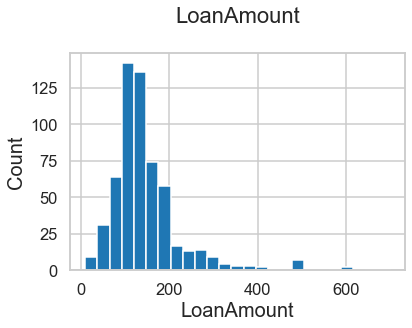

In [72]:
for i,feature in enumerate(continuous_features):
    plt.figure(i)
    df_train_sample[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Outliers

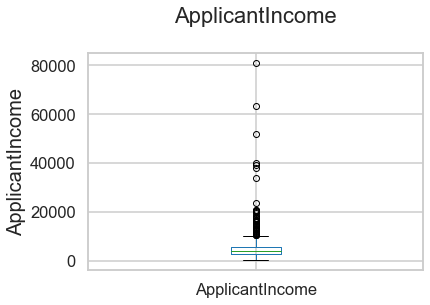

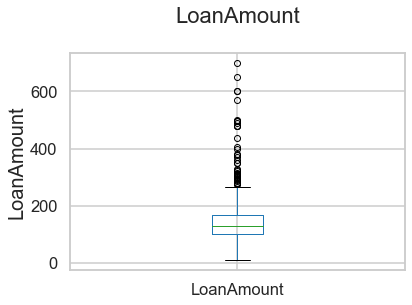

In [73]:
for i,feature in enumerate(continuous_features):
    if 0 in df_train_sample[feature].unique():
        pass
    else:
        plt.figure(i)
        df_train_sample.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [74]:
categorical_features = [feature for feature in df_train_sample.columns if df_train_sample[feature].dtypes == 'O' and feature not in ['Loan_ID','Loan_Status']]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

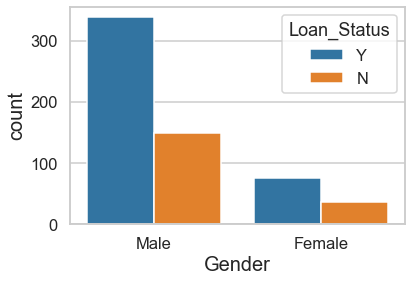

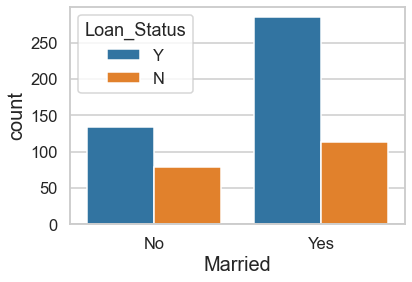

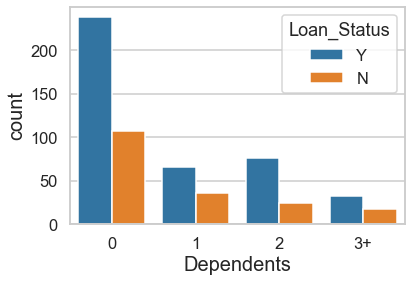

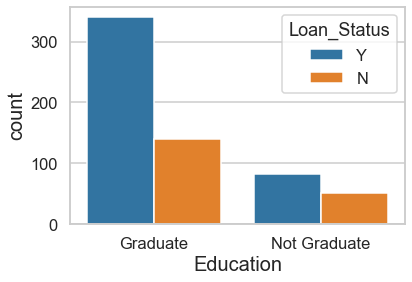

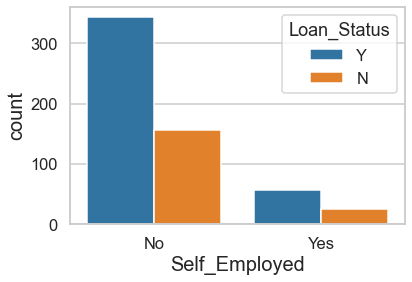

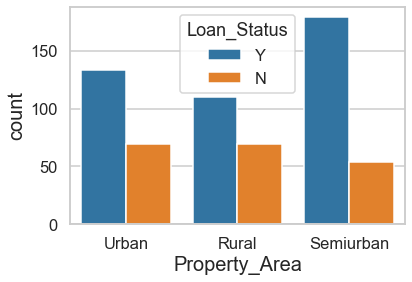

In [75]:
for i,feature in enumerate(categorical_features):
    plt.figure(i)
    sns.countplot(data = df_train_sample, x=feature, hue='Loan_Status')

In [76]:
df_train_sample['Loan_Status'] = np.where(df_train_sample.Loan_Status == 'Y',1,0)
df_train_sample.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [77]:
df_train_sample_dummies = pd.get_dummies(df_train_sample.drop(['Loan_ID'], axis = 1))
df_train_sample_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


<AxesSubplot:>

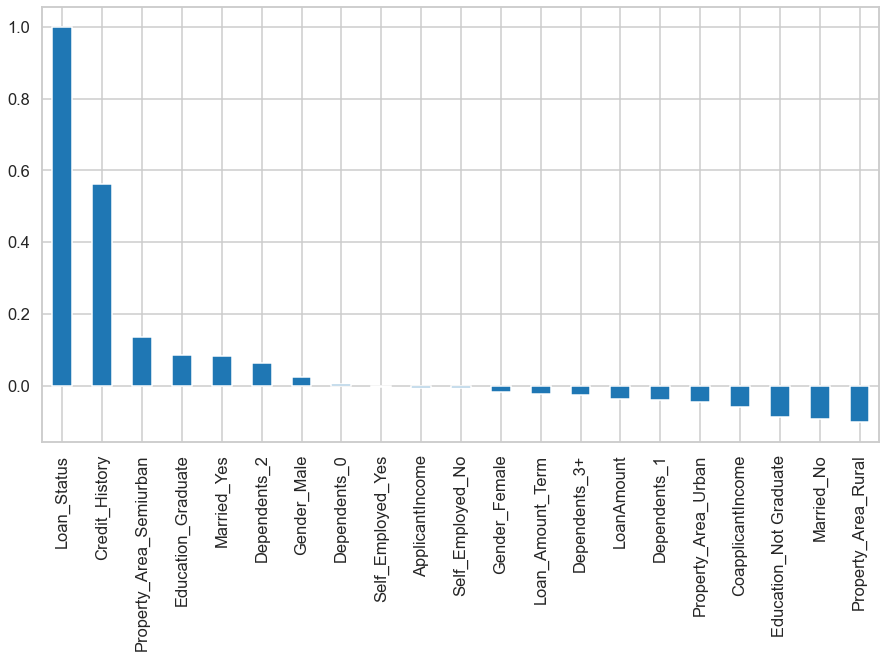

In [78]:
plt.figure(figsize=(15,8))
df_train_sample_dummies.corr()['Loan_Status'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

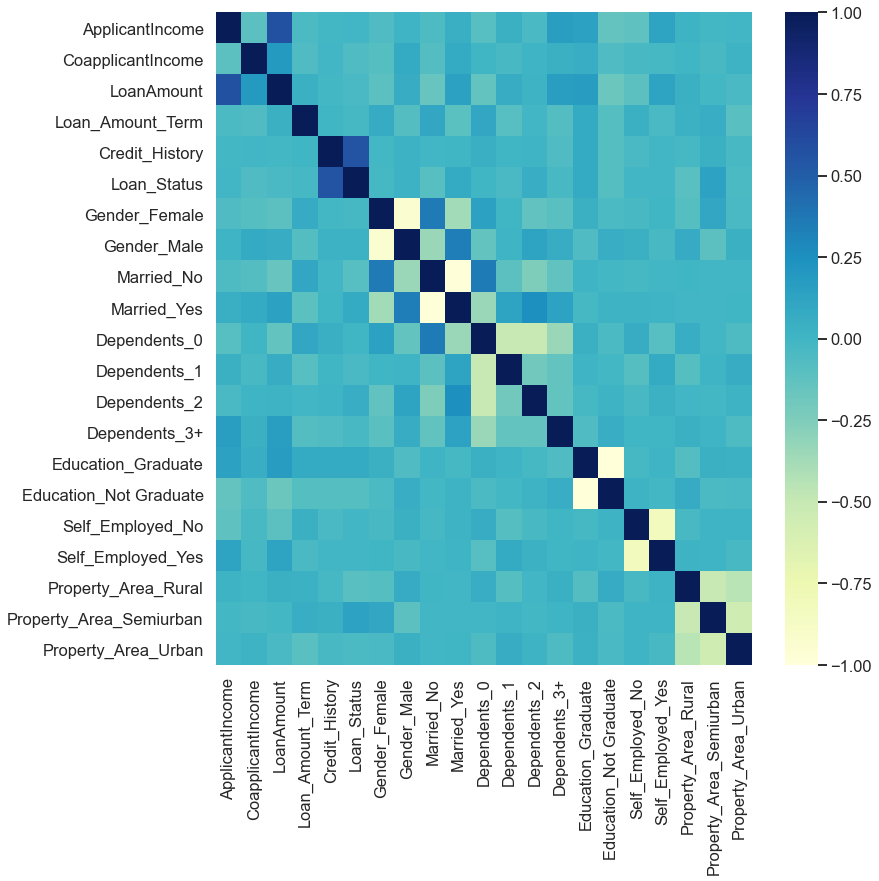

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train_sample_dummies.corr(), cmap = 'YlGnBu')

In [80]:
new_df1_target0 = df_train_sample.loc[df_train_sample["Loan_Status"]==0]
new_df1_target1 = df_train_sample.loc[df_train_sample["Loan_Status"]==1]

In [81]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    #plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

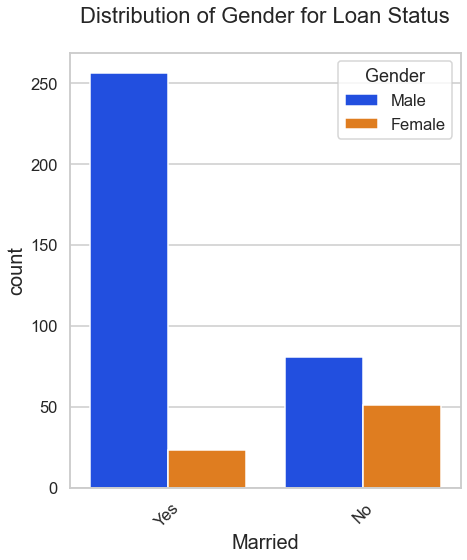

In [82]:
uniplot(new_df1_target1,col='Married',title='Distribution of Gender for Loan Status',hue='Gender')

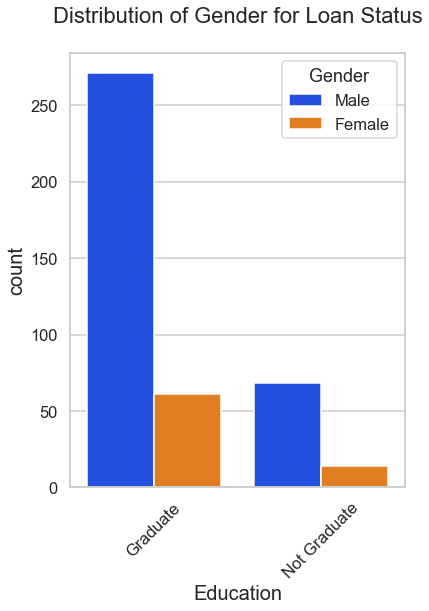

In [83]:
uniplot(new_df1_target1,col='Education',title='Distribution of Gender for Loan Status',hue='Gender')

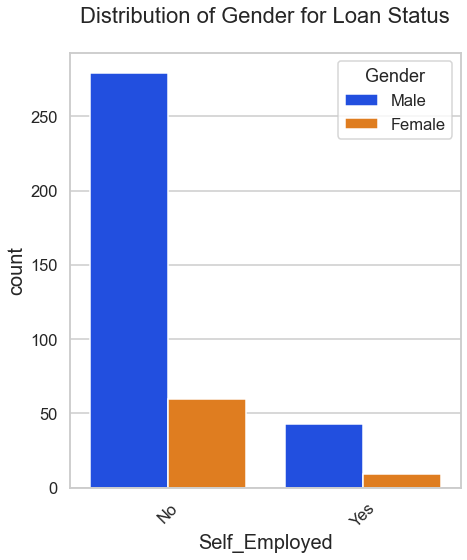

In [84]:
uniplot(new_df1_target1,col='Self_Employed',title='Distribution of Gender for Loan Status',hue='Gender')

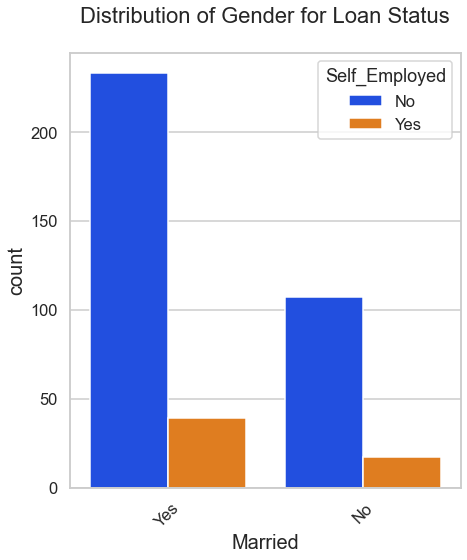

In [85]:
uniplot(new_df1_target1,col='Married',title='Distribution of Gender for Loan Status',hue='Self_Employed')

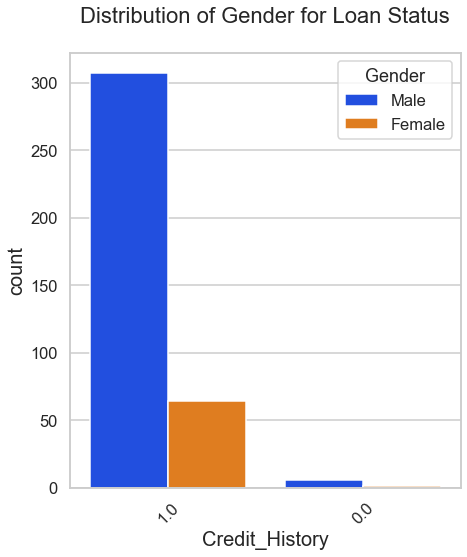

In [86]:
uniplot(new_df1_target1,col='Credit_History',title='Distribution of Gender for Loan Status',hue='Gender')

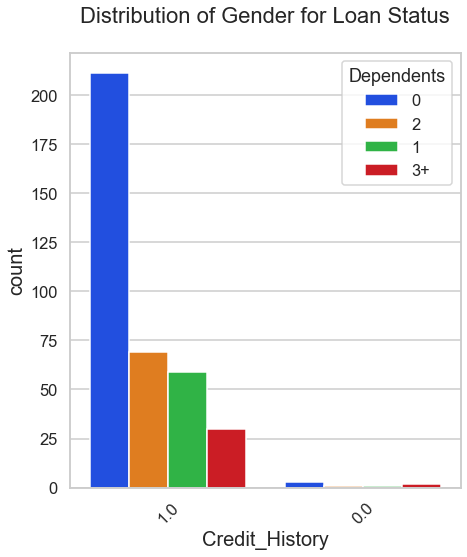

In [87]:
uniplot(new_df1_target1,col='Credit_History',title='Distribution of Gender for Loan Status',hue='Dependents')

## Feature Engineering

In [88]:
df_train_sample['Dependents'] = np.where(df_train_sample.Dependents == '3+','3',df_train_sample.Dependents)

In [89]:
df_train_sample.drop(['Loan_ID'], axis = 1, inplace = True)
df_train_sample.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [90]:
categorical_na = [feature for feature in categorical_features if df_train_sample[feature].isnull().sum() > 1]
categorical_na

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [91]:
def replace_cat_feature(dataset, categorical_na_columns):
    data = dataset.copy()
    data[categorical_na_columns] = data[categorical_na_columns].fillna('Missing')
    return data

df_train_sample = replace_cat_feature(df_train_sample, categorical_na)

df_train_sample[categorical_na].isnull().sum()

Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

In [92]:
numerical_na = [feature for feature in numerical_features if df_train_sample[feature].isnull().sum() > 1 ]
numerical_na

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [93]:
df_train_sample['Dependents'] = np.where(df_train_sample.Dependents == 'Missing','0',df_train_sample.Dependents)
df_train_sample['Dependents'] = pd.to_numeric(df_train_sample['Dependents'])

In [94]:
y = df_train_sample.Loan_Status
X = df_train_sample.drop(['Loan_Status'], axis = 1)

In [95]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [96]:
def handle_numerical_nan(dataset, numerical_na):
    for feature in numerical_na:
        median = dataset[feature].mean()
    
        ## create a new feature to capture nan values
        dataset[feature+'_nan'] = np.where(dataset[feature].isnull(),1 ,0)
        dataset[feature].fillna(median, inplace = True)
    return dataset

In [97]:
X_train = handle_numerical_nan(X_train, numerical_na)
X_valid = handle_numerical_nan(X_valid, numerical_na)

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [98]:
X_train.shape

(491, 14)

In [99]:
X_valid.shape

(123, 14)

In [100]:
drop_enc = OneHotEncoder(drop='first', sparse = False,).fit(X_train[categorical_features])

In [101]:
encoded_X_train = pd.DataFrame(drop_enc.fit_transform(X_train[categorical_features]))
encoded_X_valid = pd.DataFrame(drop_enc.transform(X_valid[categorical_features]))
encoded_X_train.index = X_train.index
encoded_X_valid.index = X_valid.index

num_X_train = X_train.drop(categorical_features, axis=1)
num_X_valid = X_valid.drop(categorical_features, axis=1)


OH_X_train = pd.concat([num_X_train, encoded_X_train], axis = 1) # Your code here
OH_X_valid = pd.concat([num_X_valid, encoded_X_valid], axis = 1) # Your code here

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
OH_X_train = sc.fit_transform(OH_X_train)
OH_X_valid = sc.transform(OH_X_valid)

## Model Building

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def score_dataset(X_train, X_valid, y_train, y_valid):
    model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
    model_dt.fit(X_train,y_train)
    y_pred = model_dt.predict(X_valid)
    return accuracy_score(y_valid, y_pred)*100

In [104]:
print("Accuracy:") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

Accuracy:
82.11382113821138
